In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

In [2]:
from keras.datasets import mnist

# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)

Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)


In [3]:
# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape for CNN input (add channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print("Reshaped training data:", x_train.shape)

Reshaped training data: (60000, 28, 28, 1)


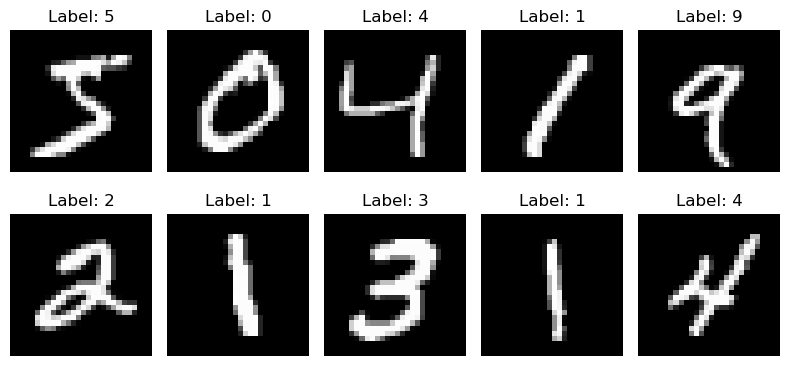

In [17]:
plt.figure(figsize=(8, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [19]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.8826 - loss: 0.3901 - val_accuracy: 0.9847 - val_loss: 0.0533
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.9841 - loss: 0.0496 - val_accuracy: 0.9867 - val_loss: 0.0503
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 28s 33ms/step - accuracy: 0.9903 - loss: 0.0307 - val_accuracy: 0.9898 - val_loss: 0.0358
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.9933 - loss: 0.0210 - val_accuracy: 0.9913 - val_loss: 0.0335
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.9950 - loss: 0.0160 - val_accuracy: 0.9922 - val_loss: 0.0321
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 27s 32ms/step - accuracy: 0.9964 - loss: 0.0111 - val_accuracy: 0.9903 - val_loss: 0.0432
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 31s 37ms/step - accuracy: 0.9964 - loss: 0.0112 - val_accuracy: 0.9910 - val_loss: 0.0390
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 33s 27ms/step - accuracy: 0.9970 - loss: 0.0085 - 

In [23]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9891 - loss: 0.0382
Test Accuracy: 0.9915000200271606


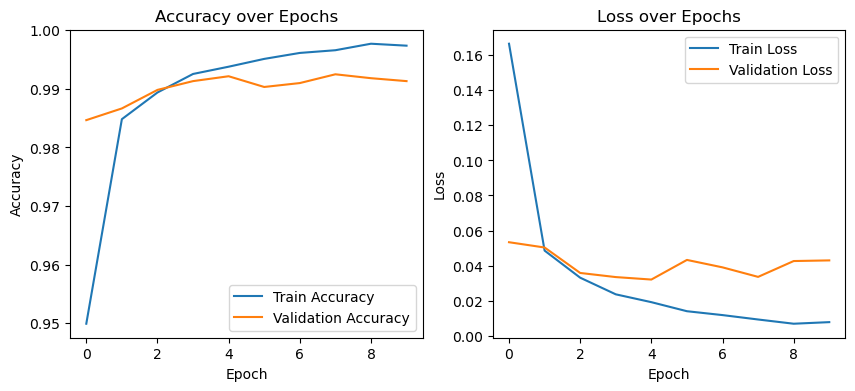

In [25]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



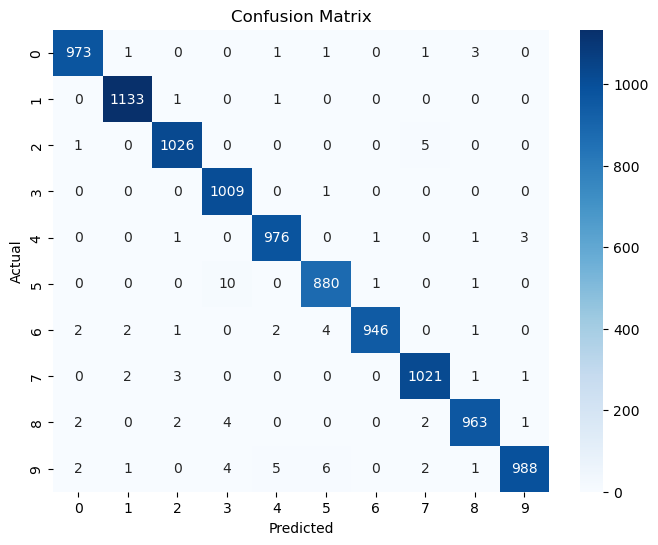

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = np.argmax(model.predict(x_test), axis=1)

print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [29]:
model.save("air_digit_cnn.h5")
print("Model saved successfully")

Model saved successfully


In [33]:
import cv2
import mediapipe as mp
import numpy as np
from tensorflow.keras.models import load_model

# -------------------------
# Load your trained CNN model
# -------------------------
model = load_model("air_digit_cnn.h5")

# -------------------------
# Mediapipe setup
# -------------------------
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(max_num_hands=1, min_detection_confidence=0.7)
mp_draw = mp.solutions.drawing_utils

# -------------------------
# Webcam setup
# -------------------------
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
if not ret:
    raise RuntimeError("❌ Could not access the webcam. Check your camera permissions.")

h, w, _ = frame.shape
canvas = np.zeros((h, w), dtype=np.uint8)

# Variable to store last predicted digit
last_pred = None

# -------------------------
# Preprocessing function
# -------------------------
def preprocess_canvas(canvas):
    """
    Converts the drawn air digit on the canvas into a 28x28 image suitable for CNN.
    Includes cropping, centering, resizing, and normalization.
    """
    # Step 1: Smooth edges
    blur = cv2.GaussianBlur(canvas, (5, 5), 0)

    # Step 2: Threshold to binary
    _, thresh = cv2.threshold(blur, 50, 255, cv2.THRESH_BINARY)

    # Step 3: Find non-zero (white) points
    coords = cv2.findNonZero(thresh)
    if coords is None:
        return np.zeros((28, 28, 1), dtype=np.float32)

    x, y, w_box, h_box = cv2.boundingRect(coords)

    # Step 4: Add padding and crop ROI
    pad = 6
    x = max(x - pad, 0)
    y = max(y - pad, 0)
    w_box = min(w_box + 2 * pad, canvas.shape[1] - x)
    h_box = min(h_box + 2 * pad, canvas.shape[0] - y)
    roi = thresh[y:y+h_box, x:x+w_box]

    # Step 5: Make it square
    size = max(w_box, h_box)
    square = np.zeros((size, size), dtype=np.uint8)
    y_off = (size - h_box) // 2
    x_off = (size - w_box) // 2
    square[y_off:y_off+h_box, x_off:x_off+w_box] = roi

    # Step 6: Dilate to make strokes thicker
    kernel = np.ones((3, 3), np.uint8)
    square = cv2.dilate(square, kernel, iterations=1)

    # Step 7: Resize to 28x28 for CNN input
    digit_resized = cv2.resize(square, (28, 28))
    digit_resized = digit_resized.astype("float32") / 255.0
    digit_resized = np.expand_dims(digit_resized, axis=(0, -1))  # shape (1,28,28,1)
    return digit_resized

# -------------------------
# Main loop
# -------------------------
print("✅ Air Digit Recognition Started")
print("Press 's' to predict | 'r' to reset | 'q' to quit")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = cv2.flip(frame, 1)
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(rgb)

    # Detect fingertip and draw path
    if results.multi_hand_landmarks:
        for handLms in results.multi_hand_landmarks:
            x = int(handLms.landmark[8].x * w)
            y = int(handLms.landmark[8].y * h)

            cv2.circle(frame, (x, y), 6, (0, 255, 0), -1)
            cv2.circle(canvas, (x, y), 8, (255, 255, 255), -1)

    # Combine live frame and drawn path
    overlay = cv2.merge([canvas]*3)
    combined = cv2.addWeighted(frame, 0.7, overlay, 0.7, 0)

    # Display last prediction on screen
    if last_pred is not None:
        cv2.putText(combined, f"Predicted: {last_pred}", (50, 100),
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 4)

    cv2.imshow("Air Digit Recognition (CNN)", combined)
    key = cv2.waitKey(1) & 0xFF

    # Press 's' to predict
    if key == ord('s'):
        digit_input = preprocess_canvas(canvas)
        preds = model.predict(digit_input, verbose=0)[0]
        pred_digit = np.argmax(preds)

        last_pred = str(pred_digit)
        print(f"Predicted Digit: {pred_digit}")

        # Clear canvas for next digit
        canvas[:] = 0

    # Press 'r' to reset canvas manually
    elif key == ord('r'):
        canvas[:] = 0
        last_pred = None

    # Press 'q' to quit
    elif key == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

✅ Air Digit Recognition Started
Press 's' to predict | 'r' to reset | 'q' to quit
Predicted Digit: 8
Predicted Digit: 7
Predicted Digit: 4
Predicted Digit: 2
Predicted Digit: 0
